In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
visitor = pd.read_csv('visitor_asean.csv')

In [40]:

visitor.describe()
visitor.isnull().sum()

Destination Country      0
Origin Country           0
2015                   210
2016                   383
2017                    55
2018                    85
2019                    97
2020                    75
dtype: int64

In [41]:
for col in ['2015','2016','2017','2018','2019','2020']:
    visitor[col] = visitor[col].fillna(visitor[col].mean())


In [42]:
visitor

,Destination Country,Origin Country,2015,2016,2017,2018,2019,2020
0,Brunei Darussalam,Total Intra-ASEAN,118719.000000,117525.00000,131351.0,134596.000000,168705.000000,32571.000000
1,Brunei Darussalam,Total Country (World),218213.000000,218809.00000,258955.0,278136.000000,333244.000000,62325.000000
2,Brunei Darussalam,Total EU-27,7750.000000,6941.00000,7581.0,7338.000000,5884.000000,2034.000000
3,Brunei Darussalam,Total EU-28,18879.000000,17301.00000,19673.0,19304.000000,20082.000000,76456.545673
4,Brunei Darussalam,Australia [AU],9972.000000,7989.00000,8600.0,9702.000000,10188.000000,2597.000000
...,...,...,...,...,...,...,...,...
902,Viet Nam,Turkey [TR],402016.998565,563143.71374,13388.0,412817.332117,442567.117284,76456.545673
903,Viet Nam,United Arab Emirates [AE],402016.998565,563143.71374,954.0,412817.332117,442567.117284,76456.545673
904,Viet Nam,United Kingdom [GB],212798.000000,254841.00000,283537.0,298114.000000,315084.000000,81433.000000
905,Viet Nam,United States [US],368190.000000,552644.00000,614117.0,687226.000000,746171.000000,172706.000000


In [55]:
visitor.describe()

,2015,2016,2017,2018,2019,2020
count,9.070000e+02,9.070000e+02,9.070000e+02,9.070000e+02,9.070000e+02,9.070000e+02
mean,4.020170e+05,5.631437e+05,3.740409e+05,4.128173e+05,4.425671e+05,7.645655e+04
std,1.756865e+06,1.865954e+06,1.982852e+06,2.076129e+06,2.163771e+06,3.793841e+05
min,1.000000e+00,1.700000e+01,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.623500e+03,2.160900e+04,5.435000e+02,5.225000e+02,5.595000e+02,1.215000e+02
50%,4.085200e+04,5.631437e+05,8.679000e+03,1.131500e+04,1.368900e+04,2.227000e+03
75%,4.020170e+05,5.631437e+05,1.194270e+05,2.010775e+05,2.579270e+05,3.063700e+04
max,2.988109e+07,3.252959e+07,3.559198e+07,3.817819e+07,3.991625e+07,6.702396e+06


In [67]:
flagged = visitor.copy()
for col in ['2015','2016','2017','2018','2019','2020']:
    Q1 = flagged[col].quantile(0.25)
    Q3 = flagged[col].quantile(0.75)
    IQR = Q3 - Q1
    mark1 = Q1 - 1.5*IQR
    mark2 = Q3 + 1.5*IQR

    lambda x: 'Outlier' if (mark1 < Q1) or (mark2 > Q3) else 'Normal'

flagged.to_csv('flagged.csv', index= True)

In [69]:
# Dòng này sẽ giữ lại những dòng KHÔNG chứa các cụm từ trên
visitor = visitor[~visitor['Origin Country'].str.contains('Total', case=False, na=False)]
visitor



,Destination Country,Origin Country,2015,2016,2017,2018,2019,2020
4,Brunei Darussalam,Australia [AU],9972.000000,7989.00000,8600.0,9702.000000,10188.000000,2597.000000
5,Brunei Darussalam,Austria [AT],122.000000,128.00000,101.0,158.000000,442567.117284,18.000000
6,Brunei Darussalam,Bahrain [BH],27.000000,19.00000,131.0,39.000000,442567.117284,5.000000
7,Brunei Darussalam,Bangladesh [BD],1531.000000,2627.00000,3553.0,3878.000000,3281.000000,638.000000
8,Brunei Darussalam,Belgium [BE],160.000000,137.00000,181.0,125.000000,442567.117284,46.000000
...,...,...,...,...,...,...,...,...
902,Viet Nam,Turkey [TR],402016.998565,563143.71374,13388.0,412817.332117,442567.117284,76456.545673
903,Viet Nam,United Arab Emirates [AE],402016.998565,563143.71374,954.0,412817.332117,442567.117284,76456.545673
904,Viet Nam,United Kingdom [GB],212798.000000,254841.00000,283537.0,298114.000000,315084.000000,81433.000000
905,Viet Nam,United States [US],368190.000000,552644.00000,614117.0,687226.000000,746171.000000,172706.000000


In [70]:
visitor.reset_index(drop=True)

,Destination Country,Origin Country,2015,2016,2017,2018,2019,2020
0,Brunei Darussalam,Australia [AU],9972.000000,7989.00000,8600.0,9702.000000,10188.000000,2597.000000
1,Brunei Darussalam,Austria [AT],122.000000,128.00000,101.0,158.000000,442567.117284,18.000000
2,Brunei Darussalam,Bahrain [BH],27.000000,19.00000,131.0,39.000000,442567.117284,5.000000
3,Brunei Darussalam,Bangladesh [BD],1531.000000,2627.00000,3553.0,3878.000000,3281.000000,638.000000
4,Brunei Darussalam,Belgium [BE],160.000000,137.00000,181.0,125.000000,442567.117284,46.000000
...,...,...,...,...,...,...,...,...
862,Viet Nam,Turkey [TR],402016.998565,563143.71374,13388.0,412817.332117,442567.117284,76456.545673
863,Viet Nam,United Arab Emirates [AE],402016.998565,563143.71374,954.0,412817.332117,442567.117284,76456.545673
864,Viet Nam,United Kingdom [GB],212798.000000,254841.00000,283537.0,298114.000000,315084.000000,81433.000000
865,Viet Nam,United States [US],368190.000000,552644.00000,614117.0,687226.000000,746171.000000,172706.000000


<Axes: title={'center': 'Tổng lượng khách du lịch toàn cầu theo năm'}>

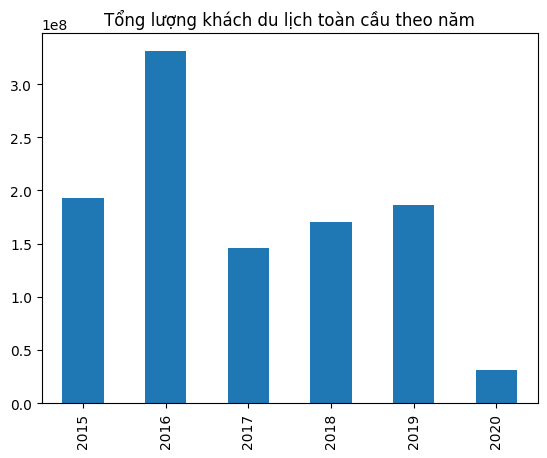

In [71]:
visitor_year = visitor[['2015','2016','2017','2018','2019','2020']].sum()
visitor_year.plot(kind='bar', title='Tổng lượng khách du lịch toàn cầu theo năm')


In [85]:
vietnam =visitor[visitor['Destination Country'] == 'Viet Nam']
top_origin = vietnam.sort_values(by='2019', ascending=False).head(10)

top_origin

,Destination Country,Origin Country,2015,2016,2017,2018,2019,2020,Growth_2020
864,Viet Nam,China [CN],1.780918e+06,2.696848e+06,4008253.0,4966468.0,5.806425e+06,871819.000000,-84.985271
879,Viet Nam,Korea [KR],1.112978e+06,1.543883e+06,2415245.0,3485406.0,4.290802e+06,819089.000000,-80.910585
877,Viet Nam,Japan [JP],6.713790e+05,7.405920e+05,798119.0,826674.0,9.519620e+05,200346.000000,-78.954412
900,Viet Nam,Taiwan Province of China [TW],3.301960e+05,5.073010e+05,616232.0,714112.0,9.267440e+05,192216.000000,-79.258997
905,Viet Nam,United States [US],3.681900e+05,5.526440e+05,614117.0,687226.0,7.461710e+05,172706.000000,-76.854367
893,Viet Nam,Russia [RU],3.388430e+05,4.339870e+05,574164.0,606637.0,6.465240e+05,244966.000000,-62.110301
882,Viet Nam,Malaysia [MY],3.465840e+05,4.075740e+05,480456.0,540119.0,6.062060e+05,116221.000000,-80.828134
889,Viet Nam,Others Unspecified Countries [O0],2.990750e+05,5.444580e+05,256166.0,381612.0,5.143240e+05,190276.000000,-63.004643
901,Viet Nam,Thailand [TH],2.146450e+05,2.669840e+05,301587.0,349310.0,5.098020e+05,125725.000000,-75.338465
885,Viet Nam,Myanmar [MM],4.020170e+05,5.631437e+05,35626.0,34505.0,4.425671e+05,76456.545673,-82.724305


<Axes: title={'center': 'Top địa điểm du lịch nổi tiếng thế giới năm 2019'}, xlabel='Destination Country'>

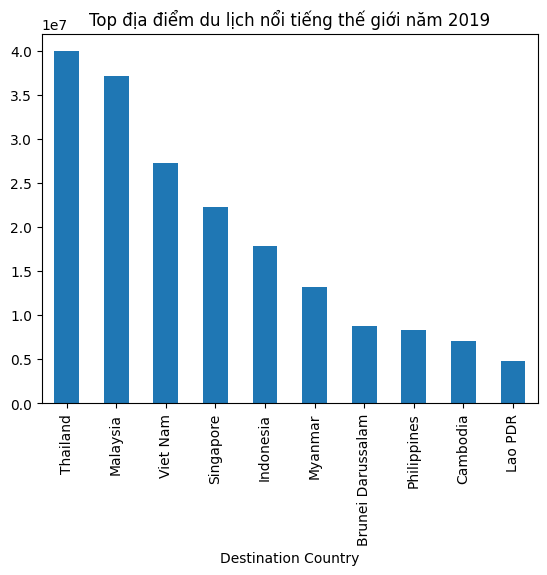

In [86]:
top_destination = visitor.groupby('Destination Country')['2019'].sum().sort_values(ascending=False).head(10)
top_destination.plot (kind= 'bar', title= 'Top địa điểm du lịch nổi tiếng thế giới năm 2019')

4     -74.509227
5     -99.995933
6     -99.998870
7     -80.554709
8     -99.989606
         ...    
902   -82.724305
903   -82.724305
904   -74.155146
905   -76.854367
906   -82.724305
Name: Growth_2020, Length: 867, dtype: float64